# Data Preprocessing

In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from everywhereml.data import Dataset
from everywhereml.preprocessing import Pipeline, MinMaxScaler
path = "C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/final_df.csv"

In [3]:
df = pd.read_csv(path)
protocol_states = ['Base', 'TSST']
df = df[df['labels'].isin(protocol_states)]
mapping_dict = {'Base': 0,
                'TSST': 1}
df['labels'] = df['labels'].map(mapping_dict)
df.head()

,ID,Time,hr,temp,labels
420,0,2023-07-13 00:07:00,75.563333,35.447233,0
421,0,2023-07-13 00:07:01,75.570000,35.549821,0
422,0,2023-07-13 00:07:02,75.573333,35.449041,0
423,0,2023-07-13 00:07:03,75.593333,35.543187,0
424,0,2023-07-13 00:07:04,75.643333,35.443003,0


## Lags Dataset

In [9]:
def calculate_rolling_stats(df, window_size):
    # Create an empty DataFrame
    lags_df = []

    # Create an indexer for fixed forward window
    indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=window_size)

    # Iterate over unique IDs in the DataFrame
    for id_value in df['ID'].unique():
        lags = pd.DataFrame()
        # Filter DataFrame for the current ID
        id_df = df[df['ID'] == id_value]

        # Perform rolling calculations for 'hr' column
        lags['min_hr'] = id_df['hr'].rolling(window=indexer, min_periods=1).min().interpolate(method='linear')
        lags['max_hr'] = id_df['hr'].rolling(window=indexer, min_periods=1).max().interpolate(method='linear')
        lags['mean_hr'] = id_df['hr'].rolling(window=indexer, min_periods=1).mean().interpolate(method='linear')
        lags['median_hr'] = id_df['hr'].rolling(window=indexer, min_periods=1).median().interpolate(method='linear')
        lags['var_hr'] = id_df['hr'].rolling(window=indexer, min_periods=1).var().interpolate(method='linear')
        lags['std_hr'] = id_df['hr'].rolling(window=indexer, min_periods=1).std().interpolate(method='linear')
        lags['skew_hr'] = id_df['hr'].rolling(window=indexer, min_periods=1).skew().interpolate(method='linear')
        lags['kurt_hr'] = id_df['hr'].rolling(window=indexer, min_periods=1).kurt().interpolate(method='linear')

        # Perform rolling calculations for 'temp' column
        lags['min_st'] = id_df['temp'].rolling(window=indexer, min_periods=1).min().interpolate(method='linear')
        lags['max_st'] = id_df['temp'].rolling(window=indexer, min_periods=1).max().interpolate(method='linear')
        lags['mean_st'] = id_df['temp'].rolling(window=indexer, min_periods=1).mean().interpolate(method='linear')
        lags['median_st'] = id_df['temp'].rolling(window=indexer, min_periods=1).median().interpolate(method='linear')
        lags['var_st'] = id_df['temp'].rolling(window=indexer, min_periods=1).var().interpolate(method='linear')
        lags['std_st'] = id_df['temp'].rolling(window=indexer, min_periods=1).std().interpolate(method='linear')
        lags['skew_st'] = id_df['temp'].rolling(window=indexer, min_periods=1).skew().interpolate(method='linear')
        lags['kurt_st'] = id_df['temp'].rolling(window=indexer, min_periods=1).kurt().interpolate(method='linear')

        # Assign 'labels' column values
        lags['labels'] = id_df['labels'].values
        lags['ID'] = id_value

        lags_df.append(lags)
    
    lags_df = pd.concat(lags_df, axis=0)

    return lags_df

# Example usage
window_size = 60
lags_df = calculate_rolling_stats(df, window_size)

In [5]:
lags_df

,min_hr,max_hr,mean_hr,median_hr,var_hr,std_hr,skew_hr,kurt_hr,min_st,max_st,mean_st,median_st,var_st,std_st,skew_st,kurt_st,labels,ID
420,75.563333,79.363333,77.844167,77.783333,1.459028,1.207902,-0.476147,-0.764748,35.352165,35.553454,35.452170,35.443472,0.003319,0.057612,0.040426,-0.976665,0,0
421,75.570000,79.363333,77.903222,77.848333,1.394324,1.180815,-0.517226,-0.679967,35.352165,35.553454,35.452493,35.443472,0.003322,0.057638,0.023243,-0.981337,0,0
422,75.573333,79.363333,77.961333,77.933333,1.321169,1.149421,-0.553435,-0.594631,35.352165,35.558125,35.452632,35.443472,0.003351,0.057885,0.038731,-0.960603,0,0
423,75.593333,79.363333,78.018833,78.025000,1.240270,1.113674,-0.580770,-0.519724,35.352165,35.558125,35.453275,35.443472,0.003371,0.058059,0.007827,-0.985527,0,0
424,75.643333,79.363333,78.075556,78.106667,1.153491,1.074007,-0.596398,-0.466608,35.352165,35.588036,35.454023,35.443472,0.003541,0.059507,0.111440,-0.800755,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104079,70.913333,70.973333,70.938667,70.933333,0.000559,0.023641,0.728541,-0.281562,32.270925,32.282201,32.277375,32.278430,0.000026,0.005123,-0.376791,-2.471059,1,14
104080,70.923333,70.973333,70.945000,70.941667,0.000478,0.021858,0.709296,-0.591778,32.270925,32.282201,32.278405,32.280247,0.000028,0.005284,-1.422783,1.543662,1,14
104081,70.933333,70.973333,70.952222,70.950000,0.000404,0.020092,0.491613,-0.591778,32.270925,32.282065,32.277140,32.278430,0.000032,0.005681,-0.969077,1.543662,1,14
104082,70.950000,70.973333,70.961667,70.961667,0.000272,0.016499,0.491613,-0.591778,32.278430,32.282065,32.280247,32.280247,0.000007,0.002570,-0.969077,1.543662,1,14


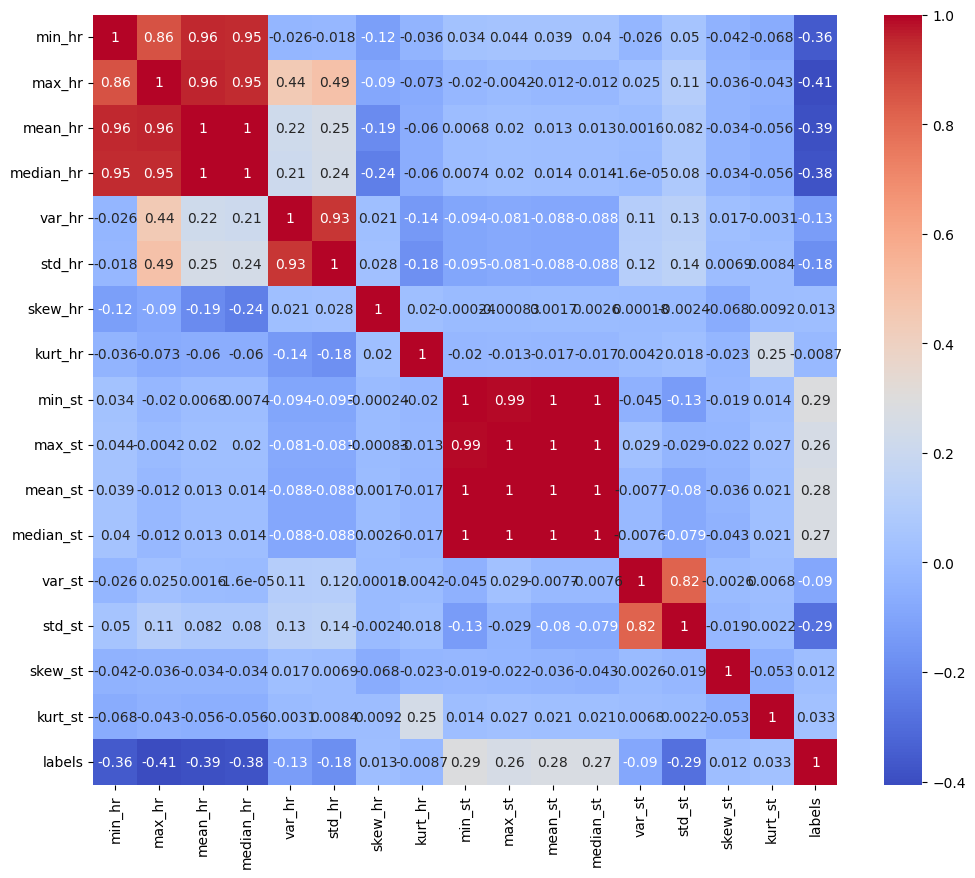

In [5]:
corr = lags_df.iloc[:,:-1].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Scale

In [10]:
from sklearn.preprocessing import MinMaxScaler as sklearnscaler
import joblib
scaler = sklearnscaler()
columns_to_exclude = ['labels', 'ID']
columns_to_scale = lags_df.columns.difference(columns_to_exclude)
lags_df[columns_to_scale] = scaler.fit_transform(lags_df[columns_to_scale])
joblib.dump(scaler, 'C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/codes/ML and DL - Python/ML/scaler.pkl')

['C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/codes/ML and DL - Python/ML/scaler.pkl']

In [6]:
scaler = Pipeline(name='scaler', steps=[MinMaxScaler()])

In [7]:
scaled = Dataset.from_pandas(lags_df, name='scaled', target_column='labels', target_name_column='labels').apply(scaler)
scaled.df.to_csv('C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/scaled_dataset.csv', index=False)
scaled = pd.read_csv('C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/scaled_dataset.csv')

In [8]:
scaled.head()

,min_hr,max_hr,mean_hr,median_hr,var_hr,std_hr,skew_hr,kurt_hr,min_st,max_st,mean_st,median_st,var_st,std_st,skew_st,kurt_st,ID,target,target_name
0,0.447531,0.44192,0.469939,0.464876,0.008988,0.094470,0.531569,0.035987,0.928227,0.944060,0.937919,0.937014,0.002369,0.048639,0.504285,0.051480,0.0,0.0,0
1,0.447658,0.44192,0.471027,0.466061,0.008589,0.092343,0.527895,0.037719,0.928227,0.944060,0.937961,0.937014,0.002371,0.048661,0.503165,0.051407,0.0,0.0,0
2,0.447722,0.44192,0.472097,0.467611,0.008139,0.089878,0.524656,0.039461,0.928227,0.944667,0.937979,0.937014,0.002392,0.048870,0.504175,0.051732,0.0,0.0,0
3,0.448104,0.44192,0.473156,0.469282,0.007640,0.087072,0.522211,0.040991,0.928227,0.944667,0.938063,0.937014,0.002406,0.049017,0.502161,0.051341,0.0,0.0,0
4,0.449060,0.44192,0.474201,0.470771,0.007106,0.083957,0.520813,0.042076,0.928227,0.948555,0.938160,0.937014,0.002527,0.050240,0.508913,0.054240,0.0,0.0,0


In [9]:
scaled.drop(['target_name', 'ID'], axis=1, inplace=True)
scaled['ID'] = lags_df['ID'].values
scaled.to_csv('C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/scaled_dataset.csv')

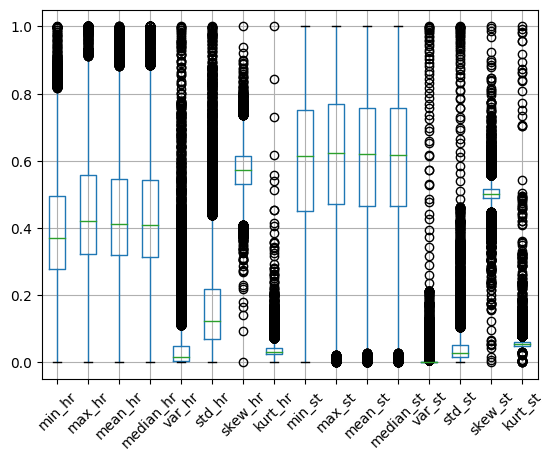

In [13]:
scaled.iloc[:,:-2].boxplot()
plt.xticks(rotation=45)
plt.show()

In [12]:
scaler.to_arduino_file('C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/codes/arduinocode/Final_code/Scaler.h', instance_name='processor')

'#ifndef UUID2027058754992\n#define UUID2027058754992\n\n#include <cstring>\n\n\nnamespace scaler {\n\n    \n        #ifndef UUID2027058754944\n#define UUID2027058754944\n\n/**\n  * MinMaxScaler(low=0, high=1)\n */\nclass Step0 {\n    public:\n\n        /**\n         * Transform input vector\n         */\n        bool transform(float *x) {\n            \n    for (uint16_t i = 0; i < 17; i++) {\n        x[i] = (x[i] - offset[i]) * scale[i] + 0;\n\n        if (x[i] < 0) x[i] = 0;\n        else if (x[i] > 1) x[i] = 1;\n    }\n\n    return true;\n\n\n            return true;\n        }\n\n    protected:\n        \n    float offset[17] = {52.15000000000f, 52.78333333333f, 52.32783333333f, 52.28333333333f, 0.00002222227f, 0.00471405041f, -6.41909133721f, -2.52696844642f, 28.17136952712f, 28.29069044367f, 28.23352537410f, 28.22770905391f, 0.00000000177f, 0.00004209686f, -7.69748356341f, -4.25852281206f, 0.00000000000f};\n    float scale[17] = {0.01911436763f, 0.01662602527f, 0.01841718610f, 0